In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(color_codes=True)
#sns.set_context('poster')
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

import sklearn as sk
import sklearn.cluster as cluster
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import hdbscan
import time

In [3]:
# load cleaned data
dtypespec = {"weeks": object, "peak": object, "var9": object, "var10": object, "var11": object, "var12": object, "var13": object}
billboardDF = pd.read_csv('billboardDF.csv',sep=",",header='infer', dtype=dtypespec)
evolutionDF = pd.read_csv('evolutionDF.csv',sep=",",header='infer')
uniqueTracksDF = pd.read_csv('evolutionDF.csv',sep=",",header='infer')
musicDF = pd.read_csv('musicDF.csv',sep=",",header='infer')
musicSubset = pd.read_csv('musicSubset.csv',sep=",",header='infer')


In [123]:
#write cluster plot function to help us
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    model = algorithm(*args, **kwds)
    labels = model.fit_predict(data)
    centers = model.cluster_centers_
    end_time = time.time()
    silhouette_score = sk.metrics.silhouette_score(data, labels, metric='euclidean')
    print(silhouette_score)
    return centers, labels
    # palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    # colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    # plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    # frame = plt.gca()
    # frame.axes.get_xaxis().set_visible(True)
    # frame.axes.get_yaxis().set_visible(True)
    # plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    # plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)

In [5]:
decade = musicSubset.ix[:, 9].copy()
clusterDF = musicSubset.ix[:, 12:28].copy()
#clusterDF = decade + handt
clusterMat = clusterDF.as_matrix()

In [15]:
len(clusterDF)

17094

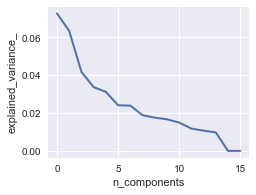

In [6]:
## PCA decomosition
pca = sk.decomposition.PCA()
# pipe = sk.pipeline.Pipeline(steps=[('pca', pca), ('logistic', clusterDF)])
pca.fit(clusterDF)

plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

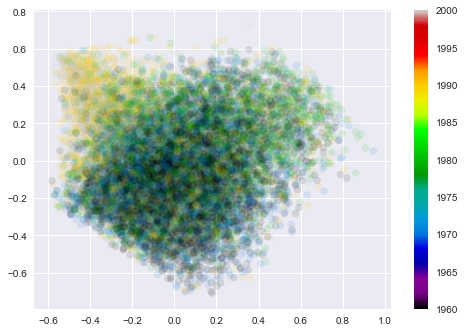

In [7]:
pca2 = sk.decomposition.PCA(n_components = 2)
pca2.fit(clusterDF)
clusterPCA2 = pca2.transform(clusterDF)
#y = np.choose(y, [0, 1]).astype(np.float)
plot = plt.scatter(clusterPCA2[:, 0], clusterPCA2[:, 1], c=decade, alpha=0.1, cmap=plt.cm.spectral)
bar = plt.colorbar(plot)
bar.set_alpha(1)
bar.draw_all()

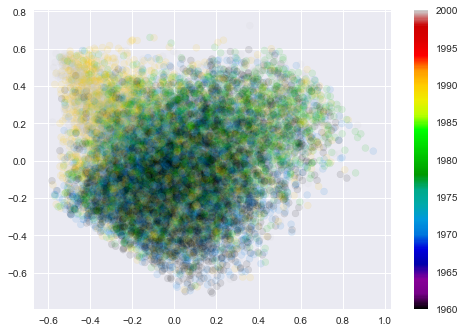

In [8]:
pca3 = sk.decomposition.PCA(n_components = 3)
pca3.fit(clusterDF)
clusterPCA3 = pca3.transform(clusterDF)
#y = np.choose(y, [0, 1]).astype(np.float)
plot = plt.scatter(clusterPCA3[:, 0], clusterPCA3[:, 1], c=decade, alpha=0.1, cmap=plt.cm.spectral)
bar = plt.colorbar(plot)
bar.set_alpha(1)
bar.draw_all()

In [10]:
pca2.components_
pca3.components_
# 12, 7 are the largest

array([[-0.02365042, -0.21896493, -0.22971655,  0.15022145, -0.24159755,
         0.10329572,  0.00609356,  0.45431872, -0.06608884, -0.29539474,
        -0.27765217,  0.16788268,  0.61742356,  0.03959805, -0.13613285,
        -0.04963569],
       [ 0.02635405,  0.03765792,  0.07250377, -0.09654655,  0.31097059,
        -0.00730926,  0.12812602, -0.47175655,  0.19919655, -0.35211602,
         0.26380646, -0.19814683,  0.48642739, -0.07216461, -0.36322239,
         0.03621945],
       [ 0.02420399, -0.25565744, -0.63201128,  0.03702705,  0.44773255,
         0.00627827,  0.04847752,  0.32394934,  0.00638359, -0.00248466,
         0.36275647, -0.24373739, -0.17566537,  0.0497504 , -0.02154573,
         0.02454268]])

In [28]:
print('silhouette score - all features:')
centers, labels = plot_clusters(clusterDF,cluster.KMeans,(),{'n_clusters':5})
print('silhouette score - PCA 2 Components:')
centers2, labels2 = plot_clusters(clusterPCA2,cluster.KMeans,(),{'n_clusters':5})
print('silhouette score - PCA 3 Components:')
centers3, labels3 = plot_clusters(clusterPCA3,cluster.KMeans,(),{'n_clusters':5})

silhouette score - all features:
0.147206897039
silhouette score - PCA 2 Components:
0.355654926972
silhouette score - PCA 3 Components:
0.302594737211


5 clusters:
0.147171006104
1612
3040
2810
4665
4966
1989.82009926
1974.34210526
1977.65124555
1973.62057878
1976.46798228


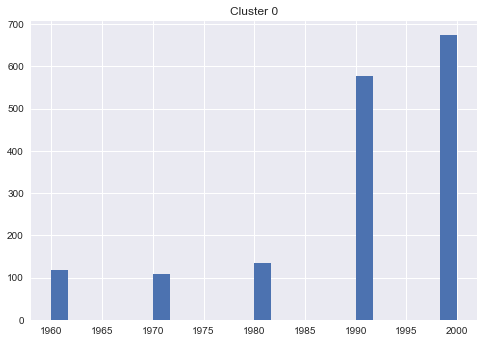

[ 0.07151336  0.12345604  0.07925453  0.04003734  0.47120122  0.03297048
  0.12290221  0.05866481  0.18177343  0.06696729  0.4326353   0.04310944
  0.06904085  0.08962986  0.02603733  0.0908065 ]


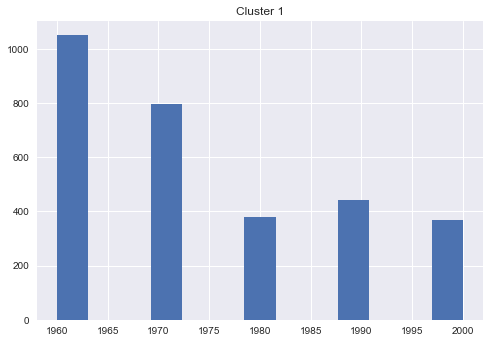

[ 0.10715489  0.19546726  0.17674909  0.10606988  0.03362641  0.06573145
  0.07390416  0.24129685  0.04955765  0.40440749  0.05430801  0.07763875
  0.00591534  0.06712777  0.28022394  0.06082107]


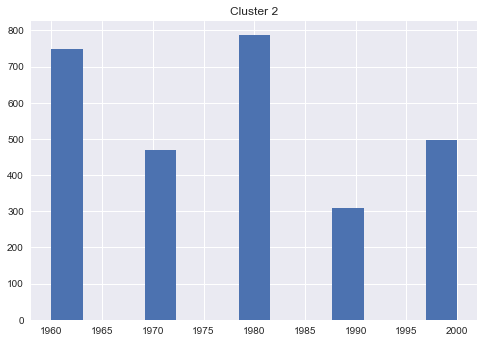

[ 0.09663527  0.11134687  0.1050038   0.13895363  0.03232399  0.11620914
  0.13029136  0.26923594  0.101105    0.00886973  0.03316462  0.11945099
  0.59636627  0.07670934  0.00860955  0.05572449]


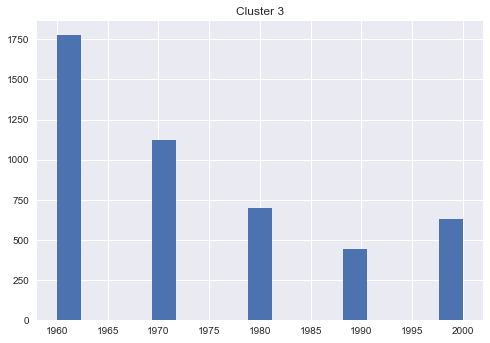

[ 0.08041316  0.08318776  0.07188236  0.15900715  0.01453624  0.0938674
  0.07636394  0.420742    0.11629175  0.07139239  0.0417675   0.29242612
  0.10544099  0.17941917  0.11036263  0.08289944]


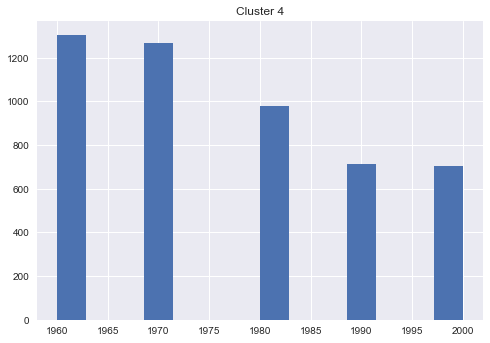

[ 0.11532232  0.22493172  0.27802079  0.0627248   0.04704547  0.05960099
  0.115035    0.09731893  0.20623718  0.07327221  0.10054772  0.19943892
  0.11275361  0.12591009  0.06817289  0.11366737]


In [148]:
print('5 clusters:')
centers, labels = plot_clusters(clusterDF,cluster.KMeans,(),{'n_clusters':5})
#centers, labels = plot_clusters(clusterPCA2,cluster.KMeans,(),{'n_clusters':5})
#centers, labels = plot_clusters(clusterPCA3,cluster.KMeans,(),{'n_clusters':5})
cluster0 = []
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []
for i in range(1, len(labels)):
    if labels[i] == 0:
        cluster0.append(decade[i])
    elif labels[i] == 1:
        cluster1.append(decade[i])
    elif labels[i] == 2:
        cluster2.append(decade[i])
    elif labels[i] == 3:
        cluster3.append(decade[i])
    elif labels[i] == 4:
        cluster4.append(decade[i])
print(len(cluster0))
print(len(cluster1))
print(len(cluster2))
print(len(cluster3))
print(len(cluster4))
print(np.mean(cluster0))
print(np.mean(cluster1))
print(np.mean(cluster2))
print(np.mean(cluster3))
print(np.mean(cluster4))
plt.hist(cluster0, bins='auto')  # plt.hist passes it's arguments to np.histogram
plt.title("Cluster 0")
plt.show()
print(centers[0])
plt.hist(cluster1, bins='auto')  # plt.hist passes it's arguments to np.histogram
plt.title("Cluster 1")
plt.show()
print(centers[1])
plt.hist(cluster2, bins='auto')  # plt.hist passes it's arguments to np.histogram
plt.title("Cluster 2")
plt.show()
print(centers[2])
plt.hist(cluster3, bins='auto')  # plt.hist passes it's arguments to np.histogram
plt.title("Cluster 3")
plt.show()
print(centers[3])
plt.hist(cluster4, bins='auto')  # plt.hist passes it's arguments to np.histogram
plt.title("Cluster 4")
plt.show()
print(centers[4])

3 clusters:
0.386126142069


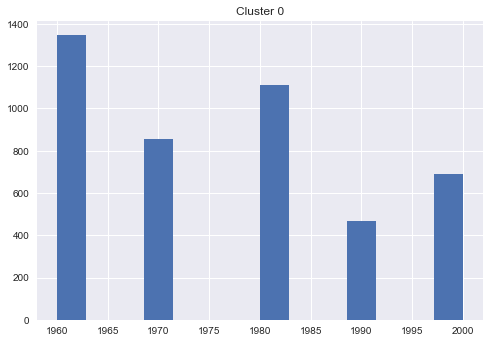

[ 0.3222404   0.15270631]


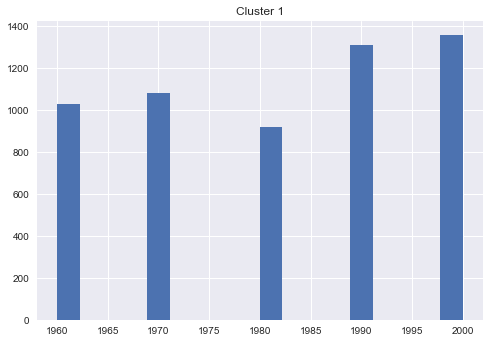

[-0.23643453  0.16732117]


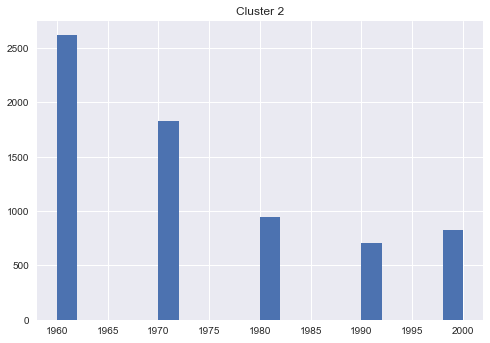

TypeError: 'PathCollection' object is not callable

In [143]:
print('3 clusters:')
#centers, labels = plot_clusters(clusterPCA2,cluster.KMeans,(),{'n_clusters':3})
#labels = plot_clusters(clusterPCA3,cluster.KMeans,(),{'n_clusters':4})
#labels = plot_clusters(clusterPCA3,cluster.KMeans,(),{'n_clusters':3})
centers, labels = plot_clusters(clusterDF,cluster.KMeans,(),{'n_clusters':3})
cluster0 = []
cluster1 = []
cluster2 = []
for i in range(1, len(labels2)):
    if labels[i] == 0:
        cluster0.append(decade[i])
    elif labels[i] == 1:
        cluster1.append(decade[i])
    elif labels[i] == 2:
        cluster2.append(decade[i])
plt.hist(cluster0, bins='auto')  # plt.hist passes it's arguments to np.histogram
plt.title("Cluster 0")
plt.show()
print(centers[0])
plt.hist(cluster1, bins='auto')  # plt.hist passes it's arguments to np.histogram
plt.title("Cluster 1")
plt.show()
print(centers[1])
plt.hist(cluster2, bins='auto')  # plt.hist passes it's arguments to np.histogram
plt.title("Cluster 2")
plt.show()
plot(centers[2])
plt.show()

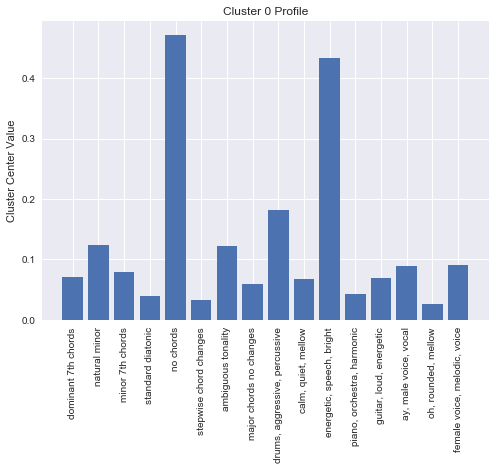

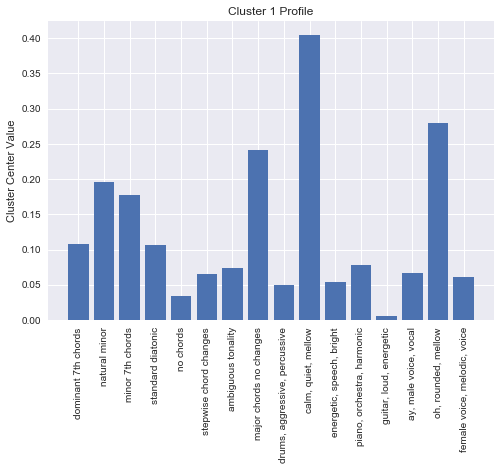

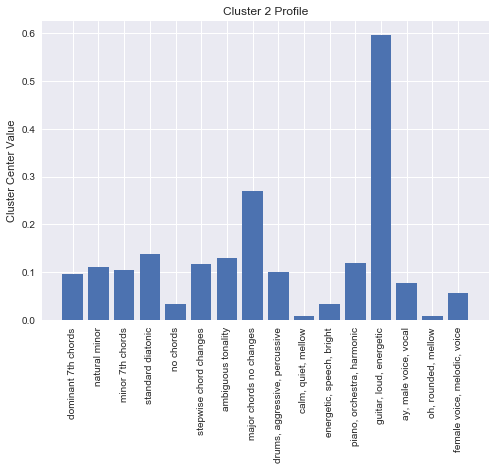

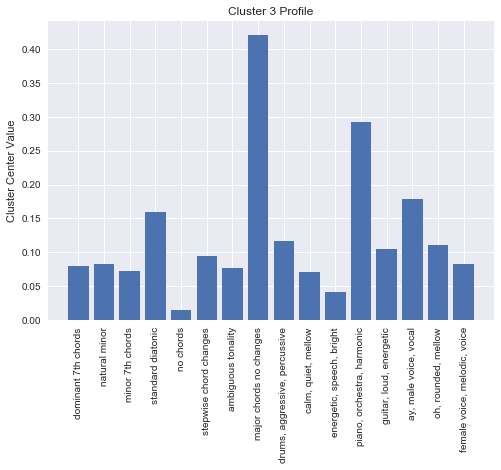

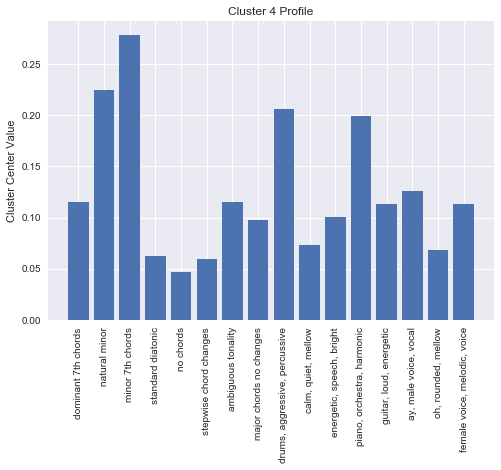

In [149]:
features = ['dominant 7th chords',
'natural minor',
'minor 7th chords',
'standard diatonic',
'no chords',
'stepwise chord changes',
'ambiguous tonality',
'major chords no changes',
'drums, aggressive, percussive',
'calm, quiet, mellow',
'energetic, speech, bright',
'piano, orchestra, harmonic',
'guitar, loud, energetic',
'ay, male voice, vocal',
'oh, rounded, mellow',
'female voice, melodic, voice']

plt.xticks(rotation=90)
plt.bar(range(0,len(centers[0])), centers[0])
plt.xticks(range(0,len(centers[0])), features)
plt.ylabel('Cluster Center Value')
plt.title('Cluster 0 Profile')
plt.show()

plt.xticks(rotation=90)
plt.bar(range(0,len(centers[1])), centers[1])
plt.xticks(range(0,len(centers[1])), features)
plt.ylabel('Cluster Center Value')
plt.title('Cluster 1 Profile')
plt.show()

plt.xticks(rotation=90)
plt.bar(range(0,len(centers[2])), centers[2])
plt.xticks(range(0,len(centers[2])), features)
plt.ylabel('Cluster Center Value')
plt.title('Cluster 2 Profile')
plt.show()

if len(centers) == 5:
    plt.xticks(rotation=90)
    plt.bar(range(0,len(centers[3])), centers[3])
    plt.xticks(range(0,len(centers[3])), features)
    plt.ylabel('Cluster Center Value')
    plt.title('Cluster 3 Profile')
    plt.show()

    plt.xticks(rotation=90)
    plt.bar(range(0,len(centers[4])), centers[4])
    plt.xticks(range(0,len(centers[4])), features)
    plt.ylabel('Cluster Center Value')
    plt.title('Cluster 4 Profile')
    plt.show()

In [144]:
len(centers)

3